In [81]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [82]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [83]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,Column, String, Integer


In [84]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [85]:
# Use the Base class to reflect the database tables
Base=automap_base()
Base.prepare(autoload_with=engine)



In [86]:


# Print all classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [92]:
# Access the classes
Measurement = Base.classes.measurement
Station = Base.classes.station

# Define relationships
# Assuming `Measurement` has a foreign key `station_id` referring to `Station`
Measurement.station = relationship("Station", back_populates="measurements")
Station.measurements = relationship("Measurement", back_populates="station")

C:\Users\vikto\AppData\Local\Temp\ipykernel_9256\208714853.py:7: SADeprecationWarning: User-placed attribute measurement.station on Mapper[measurement(measurement)] is replacing an existing ORM-mapped attribute.  Behavior is not fully defined in this case.  This use is deprecated and will raise an error in a future release
  Measurement.station = relationship("Station", back_populates="measurements")


In [88]:
# Create a session
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [95]:
# Access the Measurement class
Measurement = Base.classes.measurement

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Query to find the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()

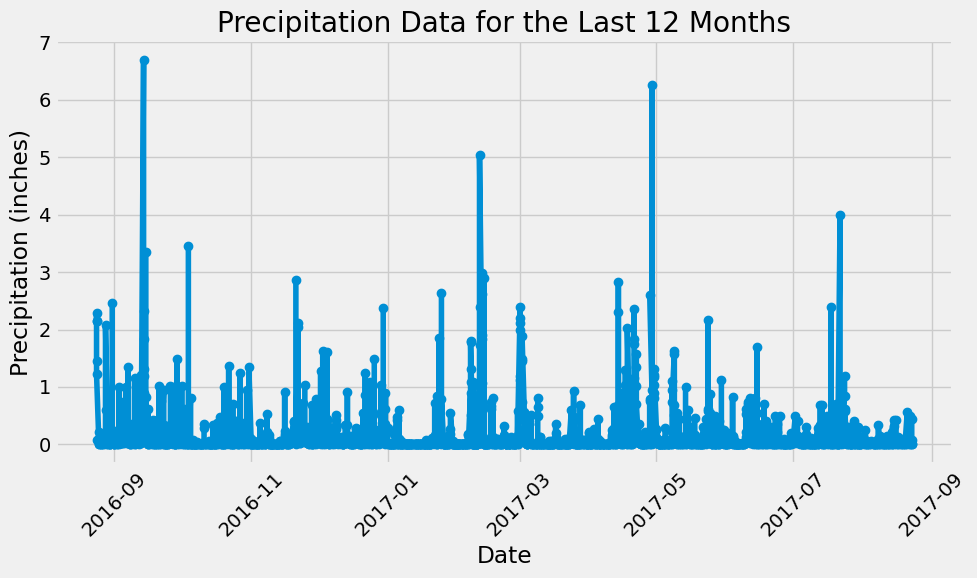

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker
from datetime import datetime, timedelta

# Create engine and reflect the tables
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(autoload_with=engine)

# Access the Measurement class
Measurement = Base.classes.measurement

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Query to find the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year prior
one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data for the last 12 months
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results to a Pandas DataFrame
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Convert 'Date' column to datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Precipitation'], marker='o', linestyle='-')
plt.title('Precipitation Data for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [100]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Query to find the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year prior
one_year_ago = most_recent_date - timedelta(days=365)

# Query to retrieve the data for the last 12 months
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results to a Pandas DataFrame
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Convert 'Date' column to datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate summary statistics for precipitation data
summary_stats = df['Precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [102]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.station)).scalar()
print(f"\nTotal number of stations: {total_stations}")

Precipitation Summary Statistics:
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

Total number of stations: 9

Most Active Stations:
    Station ID  Count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511

Temperature Statistics for Station ID USC00519281:
{'Lowest Temperature': 54.0, 'Highest Temperature': 85.0, 'Average Temperature': 71.66378066378067}


In [103]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# Query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# Convert to DataFrame for better readability
active_stations_df = pd.DataFrame(active_stations, columns=['Station ID', 'Count'])
print("\nMost Active Stations:")
print(active_stations_df)

# Get the ID of the most active station
most_active_station_id = active_stations_df.iloc[0]['Station ID']




Most Active Stations:
    Station ID  Count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511


In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()
# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()
# Convert results to a dictionary for readability
temperature_stats_dict = {
    'Lowest Temperature': temperature_stats[0][0],
    'Highest Temperature': temperature_stats[0][1],
    'Average Temperature': temperature_stats[0][2]
}

print(f"\nTemperature Statistics for Station ID {most_active_station_id}:")
print(temperature_stats_dict)


Temperature Statistics for Station ID USC00519281:
{'Lowest Temperature': 54.0, 'Highest Temperature': 85.0, 'Average Temperature': 71.66378066378067}


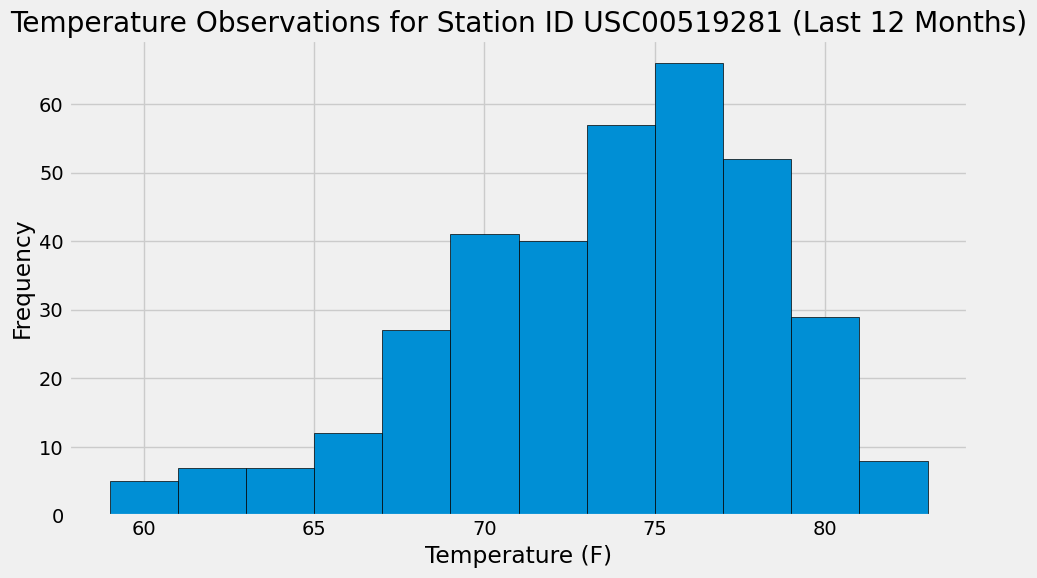

In [110]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



# Query to retrieve the most active station
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station_id = active_stations[0][0]

# Query to retrieve temperature observations for the last 12 months for the most active station
temperature_results = session.query(Measurement.tobs).filter(
    Measurement.station == most_active_station_id,
    Measurement.date >= one_year_ago
).all()

# Convert results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_results, columns=['Temperature'])

# Plot the data as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title(f'Temperature Observations for Station ID {most_active_station_id} (Last 12 Months)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the session
session.close()


# Close Session

In [16]:
# Close Session
session.close()
